<a href="https://colab.research.google.com/github/tanu-hub/tanu/blob/master/Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('dataset.csv')

In [4]:
data.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001.0,1 Ceres,1.0,Ceres,NaN,N,N,3.40,939.400,0.0900,0.200,JPL 47,2458600.5,58600.0,20190427.0,J2000,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.59478,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002.0,2 Pallas,2.0,Pallas,NaN,N,N,4.20,545.000,0.1010,18.000,JPL 37,2459000.5,59000.0,20200531.0,J2000,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.23429,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003.0,3 Juno,3.0,Juno,NaN,N,N,5.33,246.596,0.2140,10.594,JPL 112,2459000.5,59000.0,20200531.0,J2000,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.03429,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004.0,4 Vesta,4.0,Vesta,NaN,N,N,3.00,525.400,0.4228,0.200,JPL 35,2458600.5,58600.0,20190427.0,J2000,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.13948,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005.0,5 Astraea,5.0,Astraea,NaN,N,N,6.90,106.699,0.2740,3.140,JPL 114,2459000.5,59000.0,20200531.0,J2000,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.09575,426.433028,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [5]:
data.shape

(18833, 45)

In [6]:
data.isnull().sum()

id                    0
spkid                 1
full_name             1
pdes                  1
name               6013
prefix            18833
neo                   1
pha                   1
H                     1
diameter           3594
albedo             3611
diameter_sigma     3694
orbit_id              1
epoch                 1
epoch_mjd             1
epoch_cal             1
equinox               1
e                     1
a                     1
q                     1
i                     1
om                    1
w                     1
ma                    1
ad                    1
n                     1
tp                    1
tp_cal                1
per                   1
per_y                 1
moid                  1
moid_ld               1
sigma_e               1
sigma_a               1
sigma_q               1
sigma_i               1
sigma_om              1
sigma_w               1
sigma_ma              1
sigma_ad              1
sigma_n               1
sigma_tp        

In [8]:
print("uniuq values of equinox",len(data['equinox'].unique()))
print("unique values of class",len(data['class'].unique()))

uniuq values of equinox 2
unique values of class 12


In [13]:
df_equinox =data['equinox'].value_counts().to_dict()

In [14]:
df_equinox

{'J2000': 18832}

In [16]:
df_class =data['class'].value_counts().to_dict()

In [17]:
df_class

{'AMO': 92,
 'APO': 99,
 'AST': 1,
 'ATE': 9,
 'CEN': 9,
 'IMB': 176,
 'MBA': 17176,
 'MCA': 232,
 'OMB': 744,
 'TJN': 282,
 'TNO': 12}

In [18]:
data['class'] = data['class'].map(df_class)

In [19]:
data['class'].head()

0    17176.0
1    17176.0
2    17176.0
3    17176.0
4    17176.0
Name: class, dtype: float64

In [20]:
data2 = pd.read_csv('dataset.csv',usecols=['diameter','albedo','diameter_sigma'])
data2.head()

,diameter,albedo,diameter_sigma
0,939.400,0.0900,0.200
1,545.000,0.1010,18.000
2,246.596,0.2140,10.594
3,525.400,0.4228,0.200
4,106.699,0.2740,3.140


In [21]:
#lets go and see the percentage of missing values
data2.isnull().mean()

diameter          0.725582
albedo            0.726192
diameter_sigma    0.725858
dtype: float64

In [35]:
median = data2.albedo.median()
median

0.083

In [36]:
data2.albedo = data2.albedo.fillna(median)

In [37]:
data2.albedo.isnull().sum()

0

In [38]:
median2 = data2.diameter.median()
median2

4.211

In [40]:
data2.diameter = data2.diameter.fillna(median2)

In [41]:
median3 = data2.diameter_sigma.median()

In [43]:
data2.diameter_sigma = data2.diameter_sigma.fillna(median3)

In [44]:
data2.isnull().sum()

diameter          0
albedo            0
diameter_sigma    0
dtype: int64

In [47]:
data = data.drop(['diameter','diameter_sigma','albedo'],axis=1)

In [63]:
df_new = pd.concat([data,data2],axis=1,)

TypeError: ignored

In [56]:
df_new.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms,diameter,albedo,diameter_sigma
0,a0000001,2000001.0,1 Ceres,1.0,Ceres,NaN,N,N,3.40,JPL 47,2458600.5,58600.0,20190427.0,J2000,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.59478,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,17176.0,0.43301,939.400,0.0900,0.200
1,a0000002,2000002.0,2 Pallas,2.0,Pallas,NaN,N,N,4.20,JPL 37,2459000.5,59000.0,20200531.0,J2000,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.23429,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,17176.0,0.35936,545.000,0.1010,18.000
2,a0000003,2000003.0,3 Juno,3.0,Juno,NaN,N,N,5.33,JPL 112,2459000.5,59000.0,20200531.0,J2000,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.03429,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,17176.0,0.33848,246.596,0.2140,10.594
3,a0000004,2000004.0,4 Vesta,4.0,Vesta,NaN,N,N,3.00,JPL 35,2458600.5,58600.0,20190427.0,J2000,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.13948,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,17176.0,0.39980,525.400,0.4228,0.200
4,a0000005,2000005.0,5 Astraea,5.0,Astraea,NaN,N,N,6.90,JPL 114,2459000.5,59000.0,20200531.0,J2000,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.09575,426.433028,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,17176.0,0.52191,106.699,0.2740,3.140


In [57]:
df3=df_new.drop(['id','spkid','full_name','pdes','name','neo','pha','equinox'],axis=1)

In [60]:
#rest of the values contains only 1 null record therefore we can simple drop them
df3 = df3.dropna()

In [59]:
df3.isnull().sum()

prefix            0
H                 0
orbit_id          0
epoch             0
epoch_mjd         0
epoch_cal         0
e                 0
a                 0
q                 0
i                 0
om                0
w                 0
ma                0
ad                0
n                 0
tp                0
tp_cal            0
per               0
per_y             0
moid              0
moid_ld           0
sigma_e           0
sigma_a           0
sigma_q           0
sigma_i           0
sigma_om          0
sigma_w           0
sigma_ma          0
sigma_ad          0
sigma_n           0
sigma_tp          0
sigma_per         0
class             0
rms               0
diameter          0
albedo            0
diameter_sigma    0
dtype: int64

In [64]:
data2.head()

,diameter,albedo,diameter_sigma
0,939.400,0.0900,0.200
1,545.000,0.1010,18.000
2,246.596,0.2140,10.594
3,525.400,0.4228,0.200
4,106.699,0.2740,3.140


In [65]:
data.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001.0,1 Ceres,1.0,Ceres,NaN,N,N,3.40,JPL 47,2458600.5,58600.0,20190427.0,J2000,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.59478,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,17176.0,0.43301
1,a0000002,2000002.0,2 Pallas,2.0,Pallas,NaN,N,N,4.20,JPL 37,2459000.5,59000.0,20200531.0,J2000,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.23429,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,17176.0,0.35936
2,a0000003,2000003.0,3 Juno,3.0,Juno,NaN,N,N,5.33,JPL 112,2459000.5,59000.0,20200531.0,J2000,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.03429,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,17176.0,0.33848
3,a0000004,2000004.0,4 Vesta,4.0,Vesta,NaN,N,N,3.00,JPL 35,2458600.5,58600.0,20190427.0,J2000,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.13948,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,17176.0,0.39980
4,a0000005,2000005.0,5 Astraea,5.0,Astraea,NaN,N,N,6.90,JPL 114,2459000.5,59000.0,20200531.0,J2000,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.09575,426.433028,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,17176.0,0.52191


In [67]:
dataset = pd.concat([data,data2],axis=1)

In [68]:
dataset.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms,diameter,albedo,diameter_sigma
0,a0000001,2000001.0,1 Ceres,1.0,Ceres,NaN,N,N,3.40,JPL 47,2458600.5,58600.0,20190427.0,J2000,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.59478,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,17176.0,0.43301,939.400,0.0900,0.200
1,a0000002,2000002.0,2 Pallas,2.0,Pallas,NaN,N,N,4.20,JPL 37,2459000.5,59000.0,20200531.0,J2000,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.23429,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,17176.0,0.35936,545.000,0.1010,18.000
2,a0000003,2000003.0,3 Juno,3.0,Juno,NaN,N,N,5.33,JPL 112,2459000.5,59000.0,20200531.0,J2000,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.03429,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,17176.0,0.33848,246.596,0.2140,10.594
3,a0000004,2000004.0,4 Vesta,4.0,Vesta,NaN,N,N,3.00,JPL 35,2458600.5,58600.0,20190427.0,J2000,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.13948,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,17176.0,0.39980,525.400,0.4228,0.200
4,a0000005,2000005.0,5 Astraea,5.0,Astraea,NaN,N,N,6.90,JPL 114,2459000.5,59000.0,20200531.0,J2000,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.09575,426.433028,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,17176.0,0.52191,106.699,0.2740,3.140


In [74]:
dataset = dataset.drop(['prefix'],axis=1)

In [75]:
dataset.corr()

,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms,diameter,albedo,diameter_sigma
H,1.000000,-0.057430,-0.057430,-0.057826,0.153426,-0.302390,-0.346848,-0.271318,0.004597,-0.006768,-0.012671,-0.257459,0.514771,0.026749,0.024542,-0.178885,-0.178885,-0.347431,-0.347431,-0.075495,-0.084417,-0.065658,-0.052601,0.072729,-0.058243,-0.063853,-0.085040,-0.043350,-0.057583,-0.084905,0.109714,0.542211,-0.722440,0.130081,-0.216250
epoch,-0.057430,1.000000,1.000000,0.999637,-0.065647,0.016698,0.027197,0.001573,-0.004188,0.006048,0.007051,0.009385,-0.147458,0.131108,0.128817,0.005339,0.005339,0.022627,0.022627,0.000336,0.000374,0.000289,0.000064,0.005328,0.000591,0.000436,0.000379,0.000340,0.000256,0.000366,0.055393,0.001854,-0.008933,-0.006112,0.002861
epoch_mjd,-0.057430,1.000000,1.000000,0.999637,-0.065647,0.016698,0.027197,0.001573,-0.004188,0.006048,0.007051,0.009385,-0.147458,0.131108,0.128817,0.005339,0.005339,0.022627,0.022627,0.000336,0.000374,0.000289,0.000064,0.005328,0.000591,0.000436,0.000379,0.000340,0.000256,0.000366,0.055393,0.001854,-0.008933,-0.006112,0.002861
epoch_cal,-0.057826,0.999637,0.999637,1.000000,-0.065607,0.016781,0.027295,0.001509,-0.004295,0.006081,0.006978,0.009453,-0.147947,0.131134,0.128802,0.005366,0.005366,0.022729,0.022729,0.000339,0.000375,0.000290,0.000083,0.005364,0.000594,0.000438,0.000380,0.000349,0.000256,0.000367,0.055682,0.002169,-0.007339,-0.005839,0.002848
e,0.153426,-0.065647,-0.065647,-0.065607,1.000000,-0.028313,-0.262471,0.180862,-0.000107,0.014871,-0.009756,0.114059,0.229598,-0.031865,-0.030959,0.019484,0.019484,-0.246726,-0.246726,0.010612,0.020947,-0.002506,0.058544,-0.028413,-0.013843,0.004786,0.028409,0.076717,-0.006318,0.021128,-0.170400,0.000069,-0.037251,-0.053046,0.017031
a,-0.302390,0.016698,0.016698,0.016781,-0.028313,1.000000,0.936838,0.060460,-0.003075,0.004731,0.008425,0.977677,-0.434119,-0.324950,-0.320008,0.955115,0.955115,0.938574,0.938574,0.610992,0.716082,0.528807,0.507140,0.191945,0.491661,0.510660,0.734255,0.396234,0.458210,0.733112,-0.216886,0.033710,0.162864,-0.154264,0.178724
q,-0.346848,0.027197,0.027197,0.027295,-0.262471,0.936838,1.000000,0.021822,-0.003452,0.000831,0.016690,0.842436,-0.501290,-0.304140,-0.299919,0.842151,0.842151,0.999147,0.999147,0.641329,0.700963,0.588097,0.517503,0.218627,0.571055,0.573192,0.693894,0.350700,0.534342,0.701830,-0.202777,0.031865,0.184482,-0.158135,0.174649
i,-0.271318,0.001573,0.001573,0.001509,0.180862,0.060460,0.021822,1.000000,0.006242,0.001251,0.018649,0.080027,-0.017820,0.018804,0.021007,0.035925,0.035925,0.041211,0.041211,0.008026,0.015690,0.002522,0.078615,-0.331582,-0.018697,0.013613,0.020532,0.067569,-0.001595,0.015078,-0.291425,-0.399712,0.179220,0.009450,0.055985
om,0.004597,-0.004188,-0.004188,-0.004295,-0.000107,-0.003075,-0.003452,0.006242,1.000000,-0.135874,0.009209,-0.002664,0.029674,-0.002833,-0.002890,0.004337,0.004337,-0.003151,-0.003151,-0.006983,-0.003456,-0.010249,-0.000876,0.013678,-0.008796,-0.005914,-0.002346,0.004283,-0.008884,-0.003519,-0.002835,-0.027536,0.000866,0.015734,0.000613
w,-0.006768,0.006048,0.006048,0.006081,0.014871,0.004731,0.000831,0.001251,-0.135874,1.000000,0.008455,0.006789,-0.008173,0.005085,0.005664,0.003157,0.003157,0.001111,0.001111,0.009523,0.011673,0.012715,0.005695,-0.005983,0.012552,0.013915,0.010860,0.007445,0.012122,0.011493,0.004906,0.007548,0.007345,0.001999,0.011252


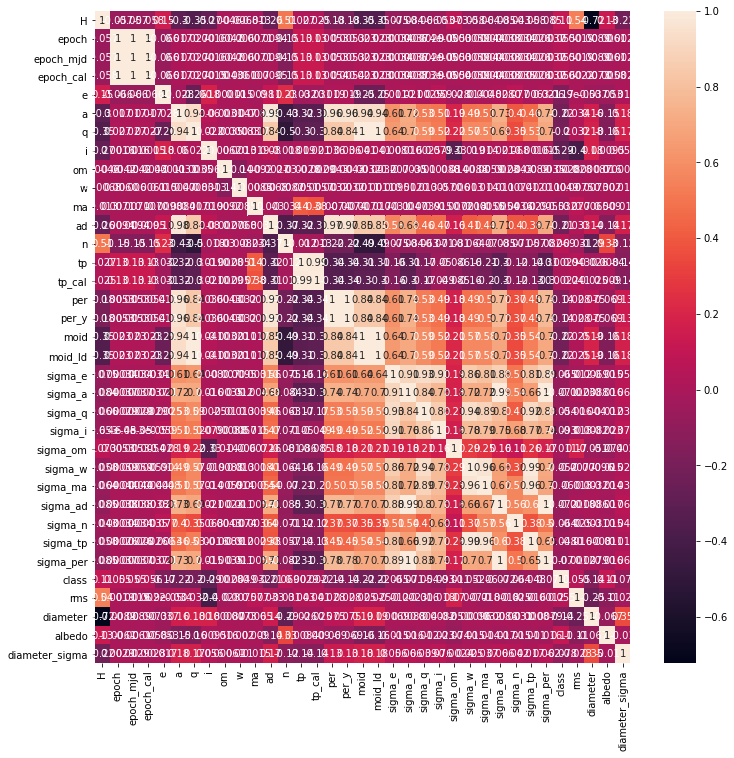

In [77]:
plt.figure(figsize=(12,12))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

In [78]:
dataset.shape

(442730, 36)

In [82]:
dataset = dataset.drop(['orbit_id'],axis=1)

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

In [86]:
from sklearn.decomposition import PCA

In [88]:
pca = PCA(n_components=2)
pca.fit(scaled_data)


ValueError: ignored